#0 Imports

In [74]:
# Imports
import sys
import importlib

import src.finance_ml.clustering.Hierarchical

sys.path.append('../')

from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.data_preparation.asset_class import Asset
from src.finance_ml.data_preparation.portfolio_class import Portfolio
from src.finance_ml.clustering.Hierarchical import Hierarchical


import importlib # importlib is a module from the standard library
importlib.reload(src.finance_ml.clustering.Hierarchical)

<module 'src.finance_ml.clustering.Hierarchical' from 'C:\\Users\\mishr\\Desktop\\Projects\\ML-in-Finance\\src\\finance_ml\\clustering\\Hierarchical.py'>

#1 Reading all the assets for processing and create Dataloader

In [35]:
import os

def list_files_and_folders_with_subdirectories(directory):
    """
    List all files and folders in the specified directory and its immediate subdirectories.

    Args:
    directory (str): The path of the directory to list contents of.

    Returns:
    dict: Dictionary with each item in the directory as keys and their contents (if any) as values.
    """
    contents = {}
    try:
        # Iterate over all items in the directory
        for item in os.listdir(directory):
            item_path = os.path.join(directory, item)

            # Check if the item is a directory
            if os.path.isdir(item_path):
                # List contents of the subdirectory
                contents[item] = os.listdir(item_path)
            else:
                # If it's a file, just list the file
                contents[item] = None
    except FileNotFoundError:
        return f"No such directory: {directory}"
    except PermissionError:
        return f"Permission denied to access: {directory}"
    except Exception as e:
        return f"An error occurred: {e}"

    return contents

# Replace 'your_directory_path' with the path of your directory
directory_path = "../data"
directory_file_dictionary = list_files_and_folders_with_subdirectories(directory_path)
print('List of all the file under the different types of stock folder')
print(directory_file_dictionary)

directory_file_dictionary.keys()
dataloader_path_dictionary: dict = {}
for folder in directory_file_dictionary.keys():
    for filename in directory_file_dictionary[folder]:
        stock_name = filename.split('_')[0]
        dataloader_path_dictionary[stock_name]= '{base}/{folder}/{filename}'.format(base=directory_path,folder=folder,filename=filename)
print('\n\n Dictionary created as required by the dataloader class')
print(dataloader_path_dictionary)

# multiples columns can be read. But for the hierarchical clustering we can restrict ourselves with just open column to demonstrate
# dataloader = DataLoader(time_index_col= 'DATE', keep_cols = ['VOLUME','OPEN', 'CLOSE', 'LOW', 'TRANSACTIONS'])
dataloader = DataLoader(time_index_col= 'DATE', keep_cols = ['OPEN'])

dataset = dataloader.load_dataset(dataloader_path_dictionary)

List of all the file under the different types of stock folder
{'commodities': ['GLD_2020-04-07_2022-04-06.parquet', 'PDBC_2020-04-07_2022-04-06.parquet', 'SLV_2020-04-07_2022-04-06.parquet'], 'cryptos': ['BTCUSD_2020-04-07_2022-04-06.parquet', 'DOGEUSD_2020-04-07_2022-04-06.parquet', 'ETHUSD_2020-04-07_2022-04-06.parquet'], 'equities': ['AAPL_2020-04-07_2022-04-06.parquet', 'FB_2020-04-07_2022-04-06.parquet', 'TSLA_2020-04-07_2022-04-06.parquet'], 'fixed_income': ['IGIB_2020-04-07_2022-04-06.parquet', 'USIG_2020-04-07_2022-04-06.parquet', 'VCIT_2020-04-07_2022-04-06.parquet'], 'FX': ['RUBEUR_2020-04-07_2022-04-06.parquet', 'USDBRL_2020-04-07_2022-04-06.parquet', 'USDEUR_2020-04-07_2022-04-06.parquet'], 'indices': ['IWM_2020-04-07_2022-04-06.parquet', 'QQQ_2020-04-07_2022-04-06.parquet', 'RNRG_2020-04-07_2022-04-06.parquet', 'SPY_2020-04-07_2022-04-06.parquet'], 'real_estate': ['KBWY_2020-04-07_2022-04-06.parquet', 'SRET_2020-04-07_2022-04-06.parquet', 'VNQI_2020-04-07_2022-04-06.parqu

#2 Create Hierarchical class object

In [75]:
# Creating the hierarchical object with a copy of original dataset 
df = dataset.copy()
labels = list(dataloader_path_dictionary.keys())
hierarchical = Hierarchical(df,labels,24)


#3 Create pipeline

(1049917, 22)


<Figure size 2000x1200 with 0 Axes>

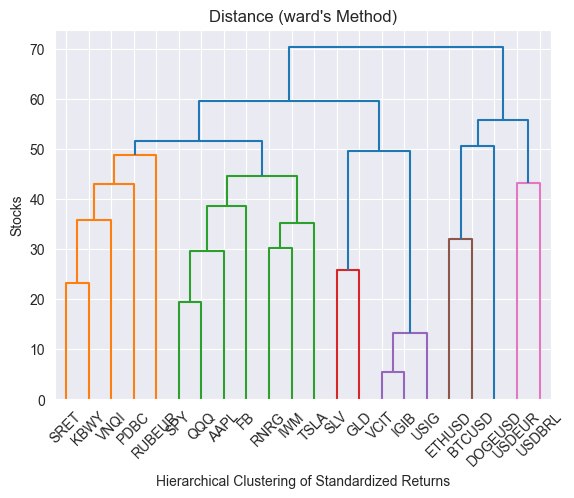

In [76]:
# preprocessing can be skipped if user wish to apply their own
hierarchical.preprocessing()
# find_linkage can be provided with different values per stock as dataframe
hierarchical.find_linkage(hierarchical.returns_df)

Visualize

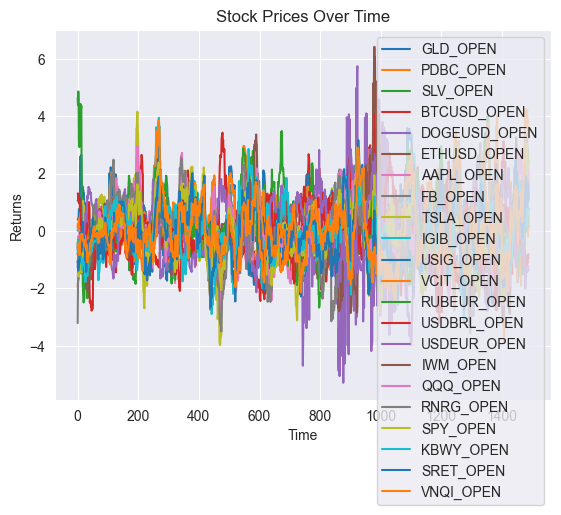

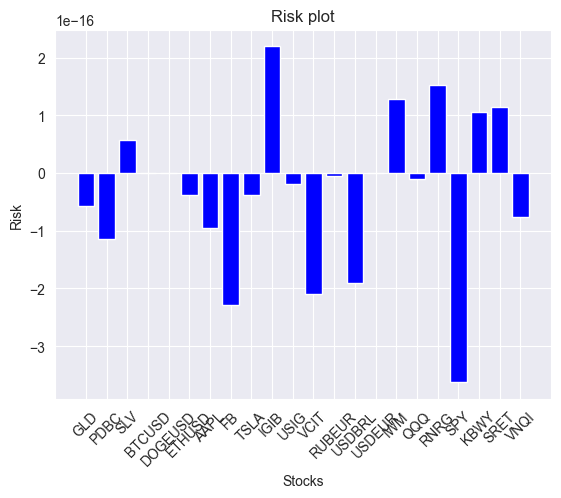

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


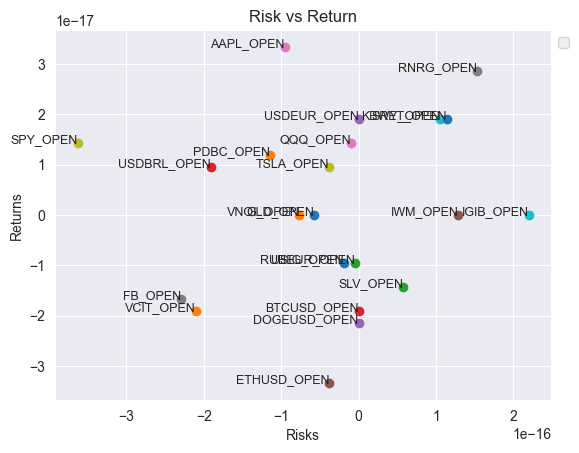

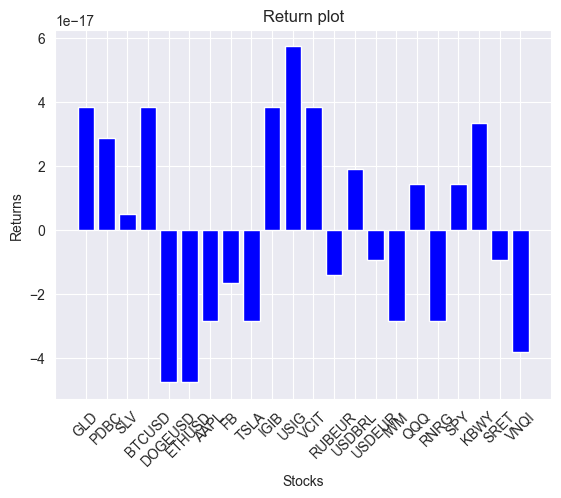

In [77]:
hierarchical.plot_stocks_timeline(hierarchical.returns_df,y_label='Returns')
hierarchical.plot_stocks_risk_bar_plot()
hierarchical.plot_stocks_risk_vs_return_plot()
hierarchical.plot_stocks_sherpe_ratio()